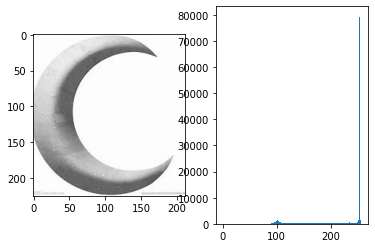

In [11]:
# plt.hist()绘制直方图
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('moon.jpg',0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# hist = cv2.calcHist([img],[0],None,[256],[0,256])    #channel,mask,bin,像素值范围
# hist1,bin = np.histogram(img.ravel(),256,[0,256])
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.hist(img.ravel(),256,[0,256])
plt.show()

(252, 235, 3)
0 b
1 g
2 r


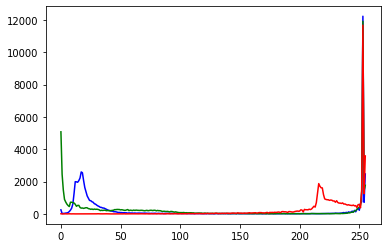

In [22]:
#cv2.calcHist()绘制直方图
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('apple.jpg')
print(img.shape)
color = ['b','g','r']
for i,c in enumerate(color):
    print(i,c)
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
plt.show()

(252, 235)


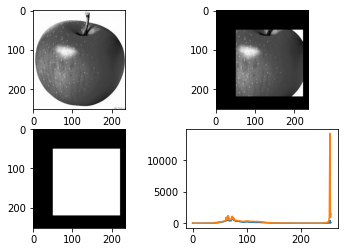

In [36]:
#使用mask绘制图像直方图
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('apple.jpg',0)
print(img.shape)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[0:2],np.uint8)
mask[50:220,50:220] = 255
img_mask = cv2.bitwise_and(img,img,mask=mask)
hist_ori = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.imshow(img_mask,'gray')
plt.subplot(223),plt.imshow(mask,'gray')
plt.subplot(224),plt.plot(hist_mask),plt.plot(hist_ori)
plt.show()

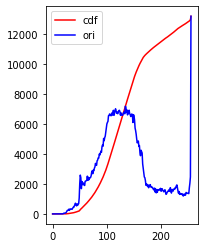

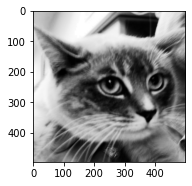

In [13]:
#直方图均衡化    增加图像的对比度 
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('1.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()    #累加和
cdf_normalized = cdf*hist.max()/cdf.max()
plt.subplot(121)
plt.plot(cdf_normalized,color='r')
plt.plot(hist,color='b')
plt.legend(['cdf','ori'],loc='upper left')
plt.show()

# 构建 Numpy 掩模数组虽cdf 为原数组虽当数组元素为 0 时虽掩盖虹䕐算时䉚忽略虺。
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# 对䉚掩盖的元素䛺值虽䦈䭻䛺值为 0
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
plt.subplot(122)
plt.imshow(img2)
plt.show()

((496, 500), (496, 500), (496, 500, 3))

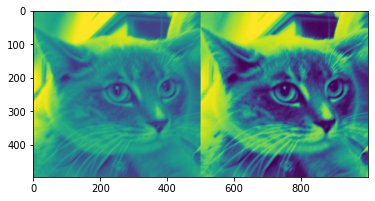

In [42]:
#opencv实现直方图均衡化    单通道均值化
import cv2
import matplotlib.pyplot as plot
import numpy as np

img = cv2.imread('1.png',0)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
plt.imshow(res)
res = np.stack((img,equ,img),axis=2)
equ.shape,img.shape,res.shape

#虽然是单通道的直方图均衡化，但是可以通过将三个通道分别均衡化之后再结合到一起


In [52]:
#分块的直方图均衡化
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('l.png',0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imshow('cll',cll)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


(496, 500, 3)


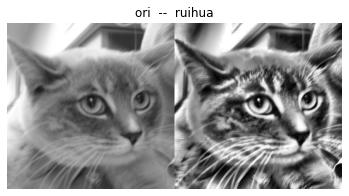

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
mri_img = cv2.imread('1.png')

lab = cv2.cvtColor(mri_img, cv2.COLOR_BGR2LAB)
print(lab.shape)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=10,tileGridSize=(8,8))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes) 
bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
rgb1 = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(mri_img,cv2.COLOR_BGR2RGB)
img = np.hstack((rgb2,rgb1))
plt.imshow(img)
plt.title('ori  --  ruihua')
plt.axis('off')
plt.show()

(180, 256)


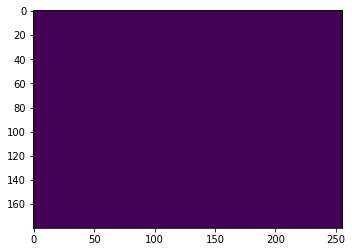

In [18]:
#绘制2D直方图
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('1.png')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])
print(hist.shape)
plt.imshow(hist,interpolation = 'nearest')
plt.show()

In [36]:
#直方图反向投影   搜索原图类似的目标
import cv2
import numpy as np
import matplotlib.pyplot as plt

roi = cv2.imread('target.png')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
target = cv2.imread('grass.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
print(roi.shape,target.shape)
# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
# 归一化蚋原始图像虽结果图像虽映射到结果图像中的最小值虽最大值虽归一化类型
#cv2.NORM_MINMAX 对数组的所有值䦊䇻䤛化虽使它们线性映射到最小值和最大值之侣
# 归一化之后的直方图便于显示虽归一化之后就成了 0 到 255 之侣的数了。
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
# Now convolute with circular disc
# 此处卷积可以把分散的点䦍在一䜦
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dst=cv2.filter2D(dst,-1,disc)
# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
# 别忘了是三䧉䨂图像虽因此䦈䭻使用 merge 变成 3 䧉䨂
thresh = cv2.merge((thresh,thresh,thresh))
# 按位操作
res = cv2.bitwise_and(target,thresh)
res = np.hstack((target,thresh,res))
print(target.shape,thresh.shape,res.shape)
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

(94, 254, 3) (231, 240, 3)
(231, 240, 3) (231, 240, 3) (231, 720, 3)
